In [ ]:
!pip install lida

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing


california = fetch_california_housing()

explain_data = pd.DataFrame(california.data, columns=california.feature_names)
target_data = pd.DataFrame(california.target, columns=california.target_names)

data = pd.concat([explain_data, target_data], axis=1)

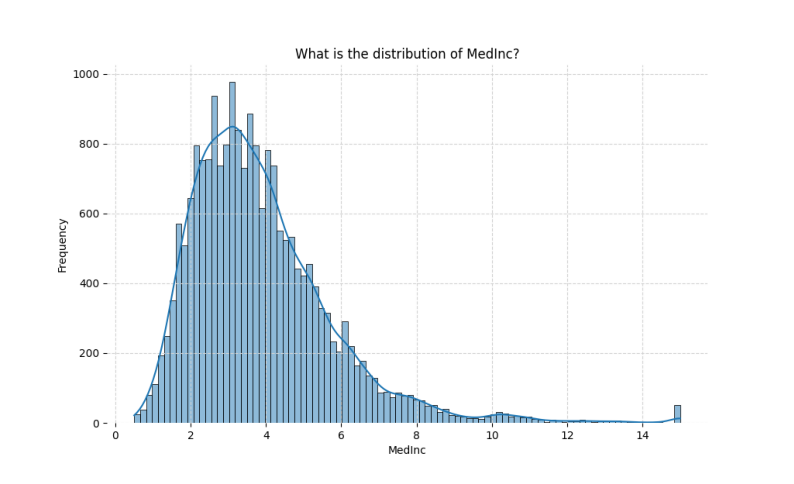

In [4]:
from lida import Manager, TextGenerationConfig , llm
from lida.utils import plot_raster


# データを適当な形式で可視化(今回はOpenAIのモデルを使用)

lida = Manager(text_gen = llm("openai", api_key="YOUR_API_KEY!"))
textgen_config = TextGenerationConfig(temperature=0.5, model="gpt-3.5-turbo", use_cache=True)

summary = lida.summarize(data, summary_method="default", textgen_config=textgen_config)

goals = lida.goals(summary, n=1, textgen_config=textgen_config)

charts = lida.visualize(summary=summary, goal=goals[0], textgen_config=textgen_config, library="seaborn")
plot_raster(charts[0].raster)

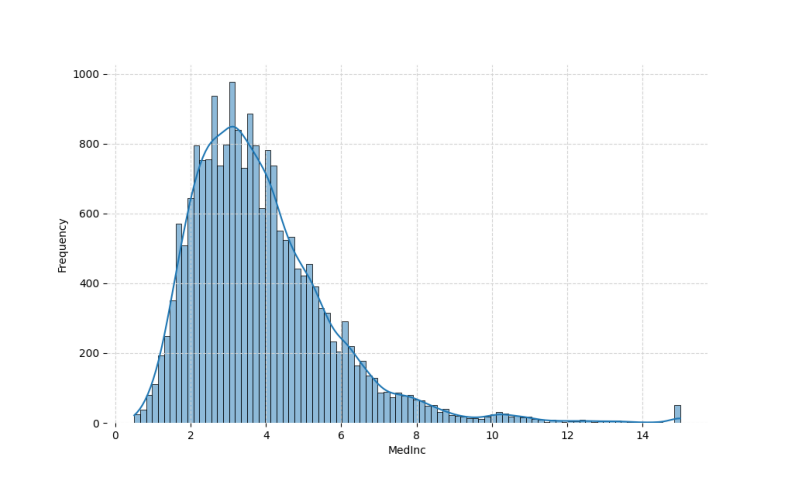

In [5]:
# 可視化してもらったグラフを編集

instructions = "delete legend"
edited_charts = lida.edit(code=charts[0].code,  summary=summary, instructions=instructions, library="seaborn", textgen_config=textgen_config)
plot_raster(edited_charts[0].raster)

In [6]:
# コードとグラフを説明してもらう

print(edited_charts[0].code)
print("~"*100)

explanations = lida.explain(code=edited_charts[0].code, textgen_config=textgen_config)
for row in explanations[0]:
    print(row["section"]," ** ", row["explanation"])

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# solution plan
# i.  ..
def plot(data: pd.DataFrame):

    # Plot histogram of MedInc
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='MedInc', kde=True)
    plt.xlabel('MedInc')
    plt.ylabel('Frequency')
    plt.title('What is the distribution of MedInc?')

    plt.title('', wrap=True)
    return plt

chart = plot(data)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
accessibility  **  The code does not involve any accessibility changes.
transformation  **  The code does not involve any data transformation.
visualization  **  The code uses the seaborn library to create a histogram plot of the 'MedInc' column in the given DataFrame. The plot is displayed with a figure size of 10x6. The plot includes both the histogram bars and a kernel density estimate (KDE) line. The x-axis represents the 'MedInc' values, and the y-axis represents the frequen

In [7]:
# 可視化を評価

evaluations = lida.evaluate(code=edited_charts[0].code,  goal=goals[0], library="seaborn", textgen_config=textgen_config)
for eval in evaluations[0]:
    print(eval["dimension"], "Score" ,eval["score"], "/ 10")
    print("\t", eval["rationale"][:200])
    print("\t**********************************")

bugs Score 10 / 10
	 No bugs or syntax errors found.
	**********************************
transformation Score 10 / 10
	 No data transformation needed for this visualization.
	**********************************
compliance Score 10 / 10
	 The code meets the specified goal of visualizing the distribution of MedInc.
	**********************************
type Score 10 / 10
	 The histogram is an appropriate visualization type for showing the distribution of a continuous variable.
	**********************************
encoding Score 10 / 10
	 The data is encoded appropriately with MedInc on the x-axis and frequency on the y-axis.
	**********************************
aesthetics Score 10 / 10
	 The aesthetics of the visualization are appropriate with a clear title, labels, and a histogram with KDE overlay.
	**********************************


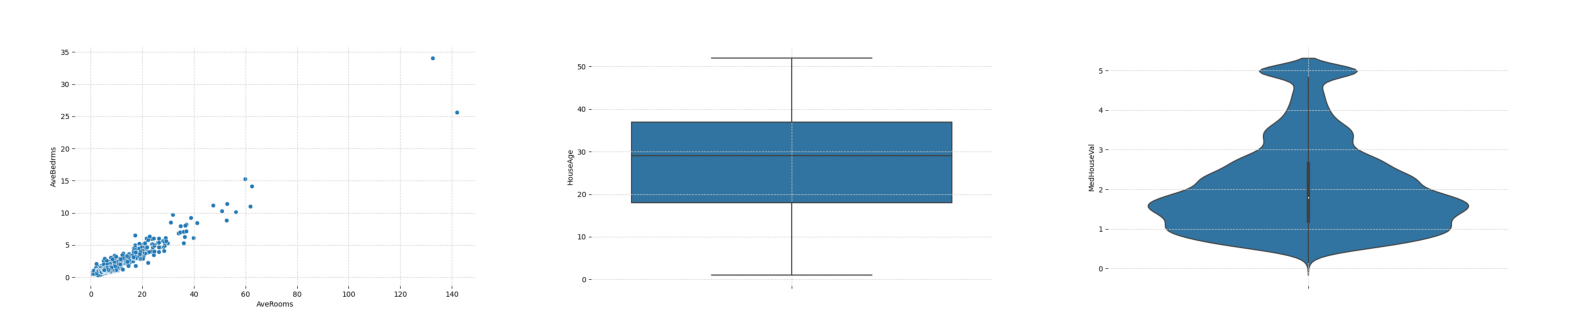

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot(data: pd.DataFrame):

    # Plot scatter plot of AveRooms vs. AveBedrms
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='AveRooms', y='AveBedrms')
    plt.xlabel('AveRooms')
    plt.ylabel('AveBedrms')
    plt.title('Relationship between AveRooms and AveBedrms')

    plt.title('', wrap=True)
    return plt

chart = plot(data)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot(data: pd.DataFrame):

    # Plot boxplot of HouseAge
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, y='HouseAge')
    plt.ylabel('HouseAge')
    plt.title('Distribution of HouseAge')

    plt.title('', wrap=True)
    return plt

chart = plot(data)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import seaborn as sns
imp

In [8]:
# 可視化してもらったコードを例に別の可視化を提示してもらう(※gpt-3.5-turboで1分程度かかります)

n_recommendations = 3

recommended_charts = lida.recommend(code=edited_charts[0].code, summary=summary, n=n_recommendations, textgen_config=textgen_config)
plot_raster([recommended_charts[i].raster for i in range(n_recommendations)], figsize=(20, 20))

for chart in recommended_charts:
    print(chart.code)
    print("~"*100)